# Plotting the results

### ``Experimental Study of Machine-Learning-Based Detection and Identification of Physical-Layer Attacks in Optical Networks``

Results shown in Sec. V.D of the paper.

This notebook can be executed based on the results collected by the `.h5` files.

In [27]:
import pickle
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['font.size'] = 16

from cycler import cycler
color_cycler = cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
marker_cycler = cycler(marker=['s', 'o', 'x', '+', '*', 'v', '^', '<', '>', '1'])
rcParams['axes.prop_cycle'] = color_cycler + marker_cycler

import warnings
warnings.filterwarnings('ignore')

## General definitions

In [28]:
column_size_figure = (10., 7.)
names = [
            "ANN",
             "kNN",
             "SVM",
             "GP",
             "DT",
             "RF",
             "NB",
             "QDA"
             ]

class_names = ['No Attack', 'OOB-Lig', 'OOB-Str', 'IB-Lig', 'IB-Str', 'POL-Lig', 'POL-Str']

## Loading results from file containing the results.

This file was generated by the file `JLT-2019-Experimental-ML-attacks.ipynb`

In [29]:
with open('models/results_final.h5', 'rb') as f:
    values = pickle.load(f)
    results_full_features = values['full']
    results_cross_validation = values['cross_validation']
    results_missing_features = values['missing']

## Plotting all the graphs shown in results section

First, we plot the results shown in Sec. V.A, where the accuracy of the models in the train/test experiments are shown, as well as the average and standard deviation of accuracy for the k-fold cross validation.

The last plot shown in this cell is presented as Fig. 7 of the paper.

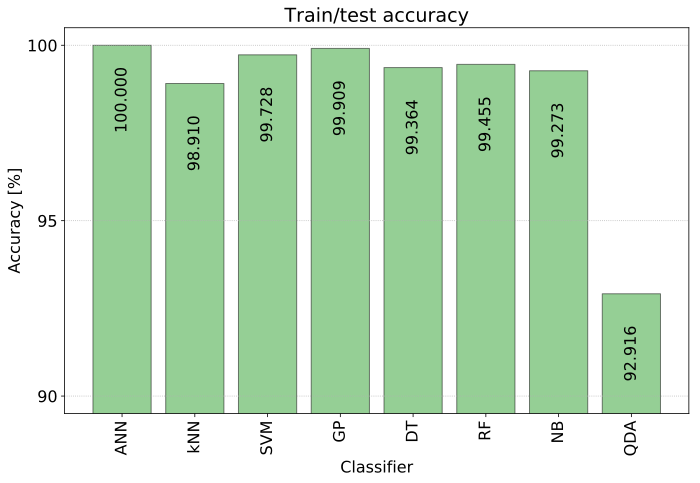

8 8


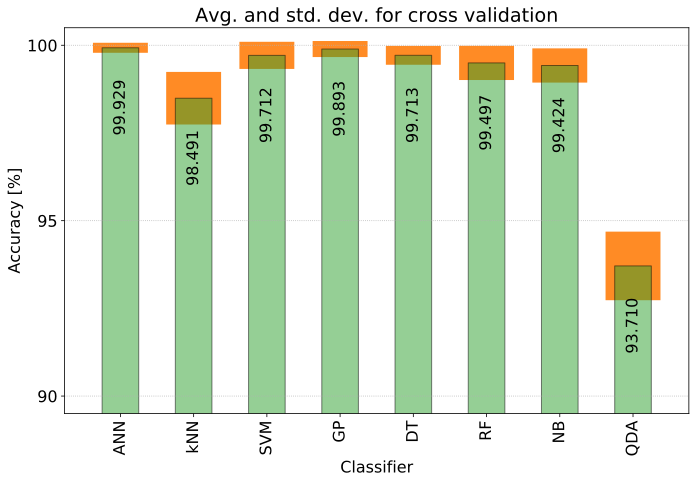

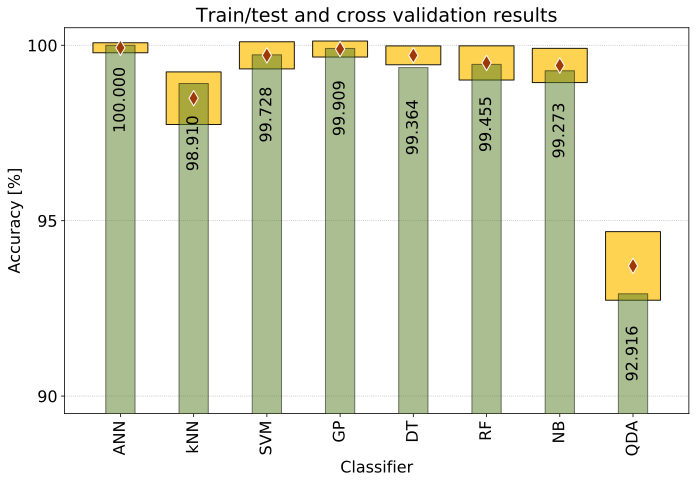

In [35]:
# also plot here a bar plot with the last performance
plt.figure(figsize=column_size_figure)

plt.yticks([90, 95, 100])
plt.gca().tick_params(grid_linestyle=':')

y = [results_full_features[x]['accuracy'] * 100. for x in names]
rects = plt.bar(range(1, len(y)+1), y, color='#2ca02c', edgecolor='black', alpha=.5)

for rect in rects:
    height = rect.get_height()
    plt.axes().text(rect.get_x() + rect.get_width()/2., height - 2.5,
                    '{:.3f}'.format(height),
                    ha='center', va='bottom', rotation=90, color='black')

plt.title('Train/test accuracy')
plt.ylabel('Accuracy [%]')
plt.xlabel('Classifier')
plt.ylim([89.5, 100.5])
plt.xticks(range(1, len(y)+1), names, rotation=90)
plt.grid(True, axis='y', which='major')
plt.grid(True, axis='y', which='minor')
plt.tight_layout()
# plt.savefig('figures/full_dataset_accuracy_summary_final.pdf')
plt.show()
plt.close()

# also plot here a bar plot with the last performance
plt.figure(figsize=column_size_figure)

plt.yticks([90, 95, 100])
plt.gca().tick_params(grid_linestyle=':')

y_max = np.array([results_cross_validation[x]['cross_validation']['test_balanced_accuracy'].mean() + results_cross_validation[x]['cross_validation']['test_balanced_accuracy'].std() for x in names]) * 100.
y_min = np.array([results_cross_validation[x]['cross_validation']['test_balanced_accuracy'].mean() - results_cross_validation[x]['cross_validation']['test_balanced_accuracy'].std() for x in names]) * 100.
plt.bar(range(1, len(y)+1), y_max - y_min, width=0.75, bottom=y_min, alpha=.9, color='#ff7f0e')


y = [results_cross_validation[x]['cross_validation']['test_balanced_accuracy'].mean() * 100. for x in names]
print(len(y), len(np.arange(1, len(names)+1)))
rects = plt.bar(range(1, len(y)+1), y, width=0.5, color='#2ca02c', edgecolor='black', alpha=.5)

for rect in rects:
    height = rect.get_height()
    plt.axes().text(rect.get_x() + rect.get_width()/2., height - 2.5,
                    '{:.3f}'.format(height),
                    ha='center', va='bottom', rotation=90, color='black')
plt.title('Avg. and std. dev. for cross validation')
plt.ylabel('Accuracy [%]')
plt.xlabel('Classifier')
plt.ylim([89.5, 100.5])
plt.xticks(range(1, len(y)+1), names, rotation=90)
plt.grid(True, axis='y', which='major')
plt.grid(True, axis='y', which='minor')
plt.tight_layout()
# plt.savefig('figures/full_dataset_cross-validation_final.pdf')
plt.show()
plt.close()

plt.figure(figsize=column_size_figure)

plt.yticks([90, 95, 100])
plt.gca().tick_params(grid_linestyle=':')

y_max = np.array([results_cross_validation[x]['cross_validation']['test_balanced_accuracy'].mean() + results_cross_validation[x]['cross_validation']['test_balanced_accuracy'].std() for x in names]) * 100.
y_min = np.array([results_cross_validation[x]['cross_validation']['test_balanced_accuracy'].mean() - results_cross_validation[x]['cross_validation']['test_balanced_accuracy'].std() for x in names]) * 100.
plt.bar(range(1, len(y)+1), y_max - y_min, width=0.75, bottom=y_min, alpha=.9, color='#fece3e', zorder=10, edgecolor='black')

y = [results_full_features[x]['accuracy'] * 100. for x in names]
rects = plt.bar(range(1, len(y)+1), y, width=0.4, color='#577e26', edgecolor='black', alpha=.5, zorder=50)

for rect in rects:
    height = rect.get_height()
    plt.axes().text(rect.get_x() + rect.get_width()/2., height - 2.5,
                    '{:.3f}'.format(height),
                    ha='center', va='bottom', rotation=90, color='black', zorder=150)
    
y = [results_cross_validation[x]['cross_validation']['test_balanced_accuracy'].mean() * 100. for x in names]
plt.scatter(range(1, len(y)+1), y, marker='d', c='#9f3a06', edgecolor='white', s=120, zorder=100)
plt.title('Train/test and cross validation results')
plt.ylabel('Accuracy [%]')
plt.xlabel('Classifier')
plt.ylim([89.5, 100.5])
plt.xticks(range(1, len(y)+1), names, rotation=90)
plt.grid(True, axis='y', which='major')
plt.grid(True, axis='y', which='minor')
plt.tight_layout()
plt.savefig('figures/8-accuracy-train-test-cv.pdf')
plt.show()
plt.close()

## Recovering values for the experiments evaluating the importance of each feature.

Due to the complexity of these experiments, we implemented the selection of the features manually. Result files are available at this repository.

In [31]:
files = ['results_full_dataset_rebuttal_kfold_one_feature_only',
         'results_full_dataset_BER_FEC_with_one_more',
        'results_full_dataset_BER_FEC_OPR_with_one_more',
        'results_full_dataset_BER-FEC_OPR_BER-POST-FEC_with_one_more',
        'results_full_dataset_BER-FEC_OPR_BER-POST-FEC_DGD_with_one_more',
        'results_full_dataset_BER-FEC_OPR_BER-POST-FEC_DGD_OSNR_with_one_more',
        'results_full_dataset_BER-FEC_OPR_BER-POST-FEC_DGD_OSNR_PDL_with_one_more',
        'results']

features_added_label = ['BER-FEC', '+ OPR', '+ BPF', '+ DGD', '+ OSNR', '+ PDL', '+ CD', 'All']
features_added = ['BER_FEC', 'OPR', 'BER_POST_FEC', 'DGD', 'OSNR', 'PDL', 'CD', 'All']

performance = {}

for file, feature in zip(files, features_added):
    with open('models/' + file + '.h5', 'rb') as f:
        (results_full, results_feature) = pickle.load(f)
        if 'All' not in feature:
            acc = results_feature[feature]['KerasNN']['cross_validation']['test_balanced_accuracy'].mean()
        else:
            acc = 0.9994047619047618
        performance[feature] = acc
print('done')

done


## Plotting the results evaluating the disturbance caused by the removal of each feature from the dataset.

The last plot in the following cell is shown as Fig. 9 in the paper.

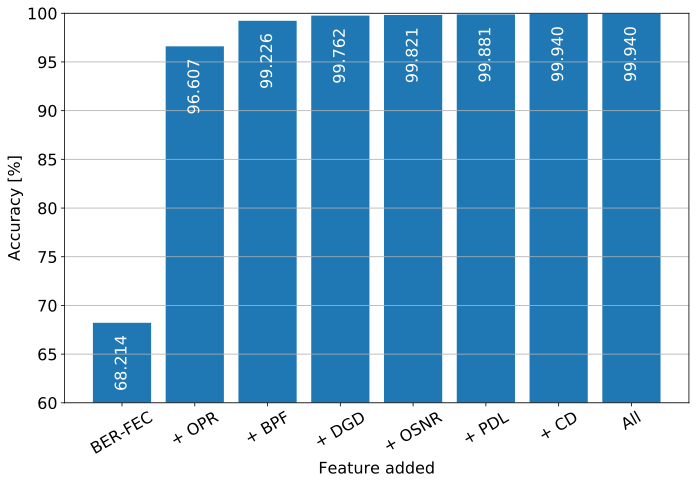

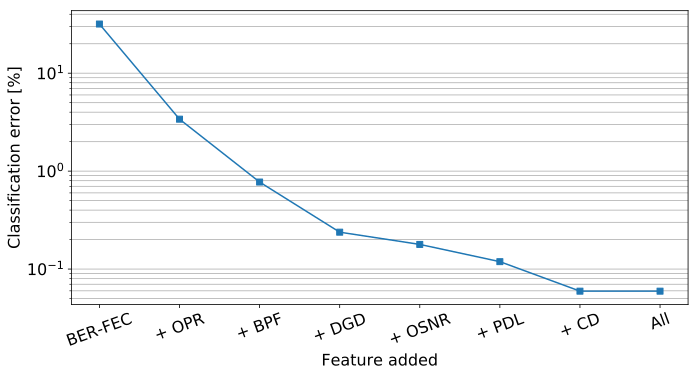

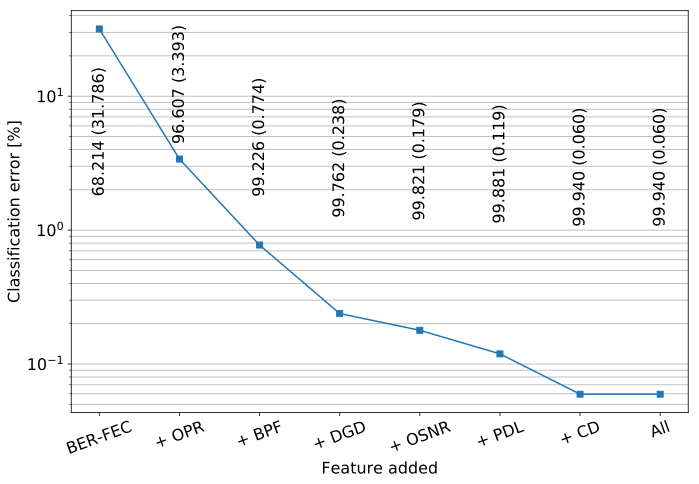

In [36]:
plt.figure(figsize=column_size_figure)

rects = plt.bar(range(0, len(performance)), [performance[x] * 100. for x in performance])

for rect in rects:
    height = rect.get_height()
    plt.axes().text(rect.get_x() + rect.get_width()/2., height - 7.,
                    '{:.3f}'.format(height),
                    ha='center', va='bottom', rotation=90, color='white')

plt.ylabel("Accuracy [%]")
plt.xlabel("Feature added")
plt.ylim([60, 100])
plt.xticks(range(0, len(performance)), features_added_label, rotation=30)
plt.grid(True, axis='y', which='major')
plt.grid(True, axis='y', which='minor')
plt.tight_layout()
# plt.savefig('figures/features_added.pdf')
plt.show()
plt.close()

plt.figure(figsize=(column_size_figure[0], column_size_figure[1] - 1.5))

plt.plot(range(0, len(performance)), [100. - (performance[x] * 100.) for x in performance])

plt.gca().set_yscale("log")
plt.ylabel("Classification error [%]")
plt.xlabel("Feature added")
plt.xticks(range(0, len(performance)), features_added_label, rotation=20)
plt.grid(True, axis='y', which='major')
plt.grid(True, axis='y', which='minor')
plt.tight_layout()
plt.savefig('figures/9-feature-removal.pdf')
plt.show()
plt.close()

plt.figure(figsize=column_size_figure)

rects = plt.plot(range(0, len(performance)), [100. - (performance[x] * 100.) for x in performance])

for idp, perf in enumerate(performance):
    y = 100. - (performance[perf] * 100.) + 1.
    if performance[perf] < .7:
        y = 100. - (performance[perf] * 100.) - 30.
    plt.axes().text(idp, y,
                    '{:.3f} ({:.3f})'.format(performance[perf] * 100., 100. - (performance[perf] * 100.)),
                    ha='center', va='bottom', rotation=90, color='black')
    
plt.gca().set_yscale("log")
plt.ylabel("Classification error [%]")
plt.xlabel("Feature added")
# plt.ylim([60, 100])
plt.xticks(range(0, len(performance)), features_added_label, rotation=20)
plt.grid(True, axis='y', which='major')
plt.grid(True, axis='y', which='minor')
plt.tight_layout()
# plt.savefig('figures/features_added_values.pdf')
plt.show()
plt.close()

## Figure 10: Accuracy change when features are removed from the dataset

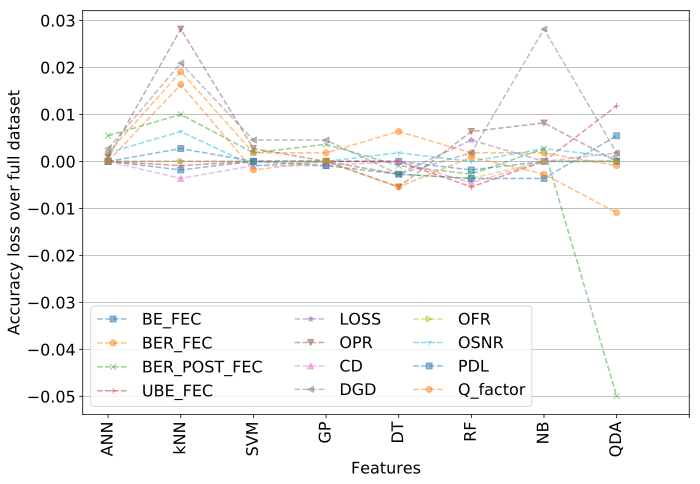

In [37]:
plt.figure(figsize=column_size_figure)
for column in results_missing_features:
    plt.plot([results_full_features[classifier]['accuracy'] - results_missing_features[column][classifier]['accuracy'] for classifier in results_missing_features[column]], label=column, linestyle='--', alpha=0.5)
plt.ylabel("Accuracy loss over full dataset")
plt.xlabel("Features")
plt.xticks(range(0, len(names)+1), names, rotation=90)
plt.legend(ncol=3)
plt.grid(True, axis='y', which='both')
plt.tight_layout()
plt.savefig('figures/10-summary-feature-removal.pdf')
plt.show()

## Figure 11: Scalability plot

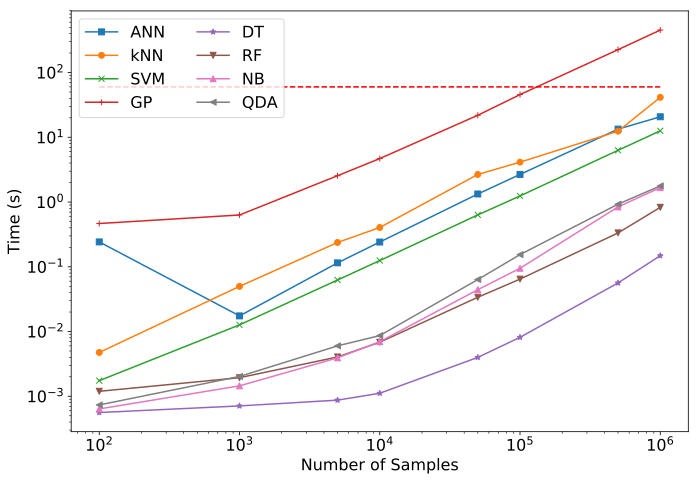

In [38]:
time_checks = [100, 1000, 5000, 10000, 50000, 100000, 500000, 1000000] # number of samples to be generated
with open('models/results_scalability.h5', 'rb') as f:
    time_spent = pickle.load(f)

plt.figure(figsize=column_size_figure)
for idc, name in enumerate(names):
    plt.semilogy(time_checks, np.array(time_spent[name]) / 1e9, label=names[idc])
plt.semilogy(time_checks, [60 for i in time_checks], color='red', linestyle='--', marker='')
plt.gca().set_xscale('log')
plt.legend(loc=2, ncol=2)
plt.xlabel('Number of Samples')
plt.ylabel('Time (s)')
plt.tight_layout()
plt.savefig('figures/11-scalability.pdf')
plt.show()
plt.close()